<a href="https://colab.research.google.com/github/Matiwosb/cd0385-project-starter/blob/main/Copy_of_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.20.2 requires bokeh>=3.1, but you have bokeh 2.0.1 which is incompatible.
panel 1.7.1 requires bokeh<3.8.0,>=3.5.0, but you have bokeh 2.0.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 155.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires numpy<2.0.0,>1.16.0, but you have numpy 2.0.2 which is incompatible.
holoviews 1.20.2 requires bokeh>=3.1, but you have bokeh 2.0.1 which is incompatible.
panel 1.7.1 requires bokeh<3.8.0,>=3.5.0, but you have bokeh 2.0.1 which is incompatible.


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "matiwosbirbo"
kaggle_key = "d0626ea81aedb74336e0dabcd34f51ab"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:

    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
!pip install kaggle
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train = train.drop(columns=["casual", "registered"])

In [ ]:
predictor = TabularPredictor(label='count', eval_metric='rmse',path="autogluon_models").fit(train, time_limit=600, presets='best_quality')
# predictor.leaderboard(silent=True)
# predictor

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.15 GB / 12.67 GB (87.9%)
Disk Space Avail:   183.85 GB / 225.83 GB (81.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stac

(_ray_fit pid=61283) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=61283) [2000]	valid_set's rmse: 129.849 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=61460) [1000]	valid_set's rmse: 132.725 [repeated 3x across cluster]
(_ray_fit pid=61519) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=61519) [4000]	valid_set's rmse: 125.904 [repeated 2x across cluster]
(_ray_fit pid=61583) [4000]	valid_set's rmse: 133.013 [repeated 7x across cluster]


(_ray_fit pid=61519) 	Ran out of time, early stopping on iteration 8474. Best iteration is:
(_ray_fit pid=61519) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=61583) [7000]	valid_set's rmse: 132.416 [repeated 4x across cluster]


(_ray_fit pid=61583) 	Ran out of time, early stopping on iteration 8885. Best iteration is:
(_ray_fit pid=61583) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=61734) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=61734) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=61799) [3000]	valid_set's rmse: 138.261 [repeated 6x across cluster]


(_ray_fit pid=61734) 	Ran out of time, early stopping on iteration 7954. Best iteration is:
(_ray_fit pid=61734) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=61799) [5000]	valid_set's rmse: 137.961 [repeated 2x across cluster]


(_dystack pid=61107) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=61107) 	90.97s	 = Training   runtime
(_dystack pid=61107) 	12.54s	 = Validation runtime
(_dystack pid=61107) Fitting model: WeightedEnsemble_L2 ... Training model for up to 144.54s of the 44.97s of remaining time.
(_dystack pid=61107) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=61107) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=61107) 	0.02s	 = Training   runtime
(_dystack pid=61107) 	0.0s	 = Validation runtime
(_dystack pid=61107) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=61107) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 44.94s of the 44.69s of remaining time.
(_dystack pid=61107) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=61943) [1000]	valid_set's rmse: 70.3611
(_ray_fit pid=61942) [1000]	valid_set's rmse: 71.4318
(_ray_fit pid=62059) [1000]	valid_set's rmse: 77.4878
(_ray_fit pid=62095) [1000]	valid_set's rmse: 73.7739
(_ray_fit pid=62184) [1000]	valid_set's rmse: 77.0022
(_ray_fit pid=62182) [1000]	valid_set's rmse: 76.4032
(_ray_fit pid=62301) [1000]	valid_set's rmse: 73.4134
(_ray_fit pid=62353) [1000]	valid_set's rmse: 75.8094


(_dystack pid=61107) 	-74.3067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=61107) 	53.64s	 = Training   runtime
(_dystack pid=61107) 	2.17s	 = Validation runtime
(_dystack pid=61107) Fitting model: WeightedEnsemble_L3 ... Training model for up to 144.54s of the -13.27s of remaining time.
(_dystack pid=61107) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=61107) 	-74.2555	 = Validation score   (-root_mean_squared_error)
(_dystack pid=61107) 	0.02s	 = Training   runtime
(_dystack pid=61107) 	0.0s	 = Validation runtime
(_dystack pid=61107) AutoGluon training complete, total runtime = 157.97s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 82.2 rows/s (1210 batch size)
(_dystack pid=61107) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/autogluon_models/ds_sub_fit/sub_fit_ho")
(_dystack pid=61107) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leaderboard

In [ ]:
# test_predictions = predictor.predict(test)

# test_predictions = test_predictions.clip(lower=0)  # Ensure no negative predictions

# submission['count'] = test_predictions

# submission.to_csv('submission.csv', index=False)
# print("Submission file created successfully!")

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:

predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.089160,root_mean_squared_error,27.755425,419.092701,0.000673,0.031983,3,True,11
1,RandomForestMSE_BAG_L2,-53.421799,root_mean_squared_error,22.139907,301.119159,0.729560,45.455217,2,True,10
2,LightGBM_BAG_L2,-54.950192,root_mean_squared_error,21.912428,297.792411,0.502081,42.128469,2,True,9
3,LightGBMXT_BAG_L2,-60.576988,root_mean_squared_error,26.523111,331.477031,5.112765,75.813090,2,True,8
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.057484,0.037809,0.057484,0.037809,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.058479,0.075069,0.000995,0.037261,2,True,7
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056874,0.041682,0.056874,0.041682,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.749154,20.740465,0.749154,20.740465,1,True,5
8,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,3.186897,46.777787,3.186897,46.777787,1,True,4
9,CatBoost_BAG_L1,-131.151311,root_mean_squared_error,0.197182,97.289757,0.197182,97.289757,1,True,6


In [ ]:
# predictor.fit_summary()

### Create predictions from test dataset

In [ ]:
# Generate prediction for the test dataset
predictions = predictor.predict(test)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())

count    6493.000000
mean      100.367859
std        89.747650
min         3.294209
25%        19.674845
50%        63.655087
75%       167.633759
max       367.943207
Name: count, dtype: float64


In [ ]:
# How many negative values do we have?
predictions = predictions.clip(lower=0)  # Ensure no negative predictions

# Display the first few predictions to verify
print(predictions.head())

0    23.283077
1    43.196133
2    46.531803
3    49.830566
4    52.484119
Name: count, dtype: float32


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.04MB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-12 03:30:26.957000  first raw submission               SubmissionStatus.COMPLETE  1.80486      1.80486       
submission.csv               2025-06-11 22:29:23.557000  first raw submission               SubmissionStatus.COMPLETE  1.80653      1.80653       
submission_new_features.csv  2025-06-11 08:10:17.707000  new features                       SubmissionStatus.COMPLETE  0.78078      0.78078       
submission.csv               2025-06-11 07:45:05.617000  first raw submission               SubmissionStatus.COMPLETE  1.75538      1.75538       


#### Initial score of `1.80486`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

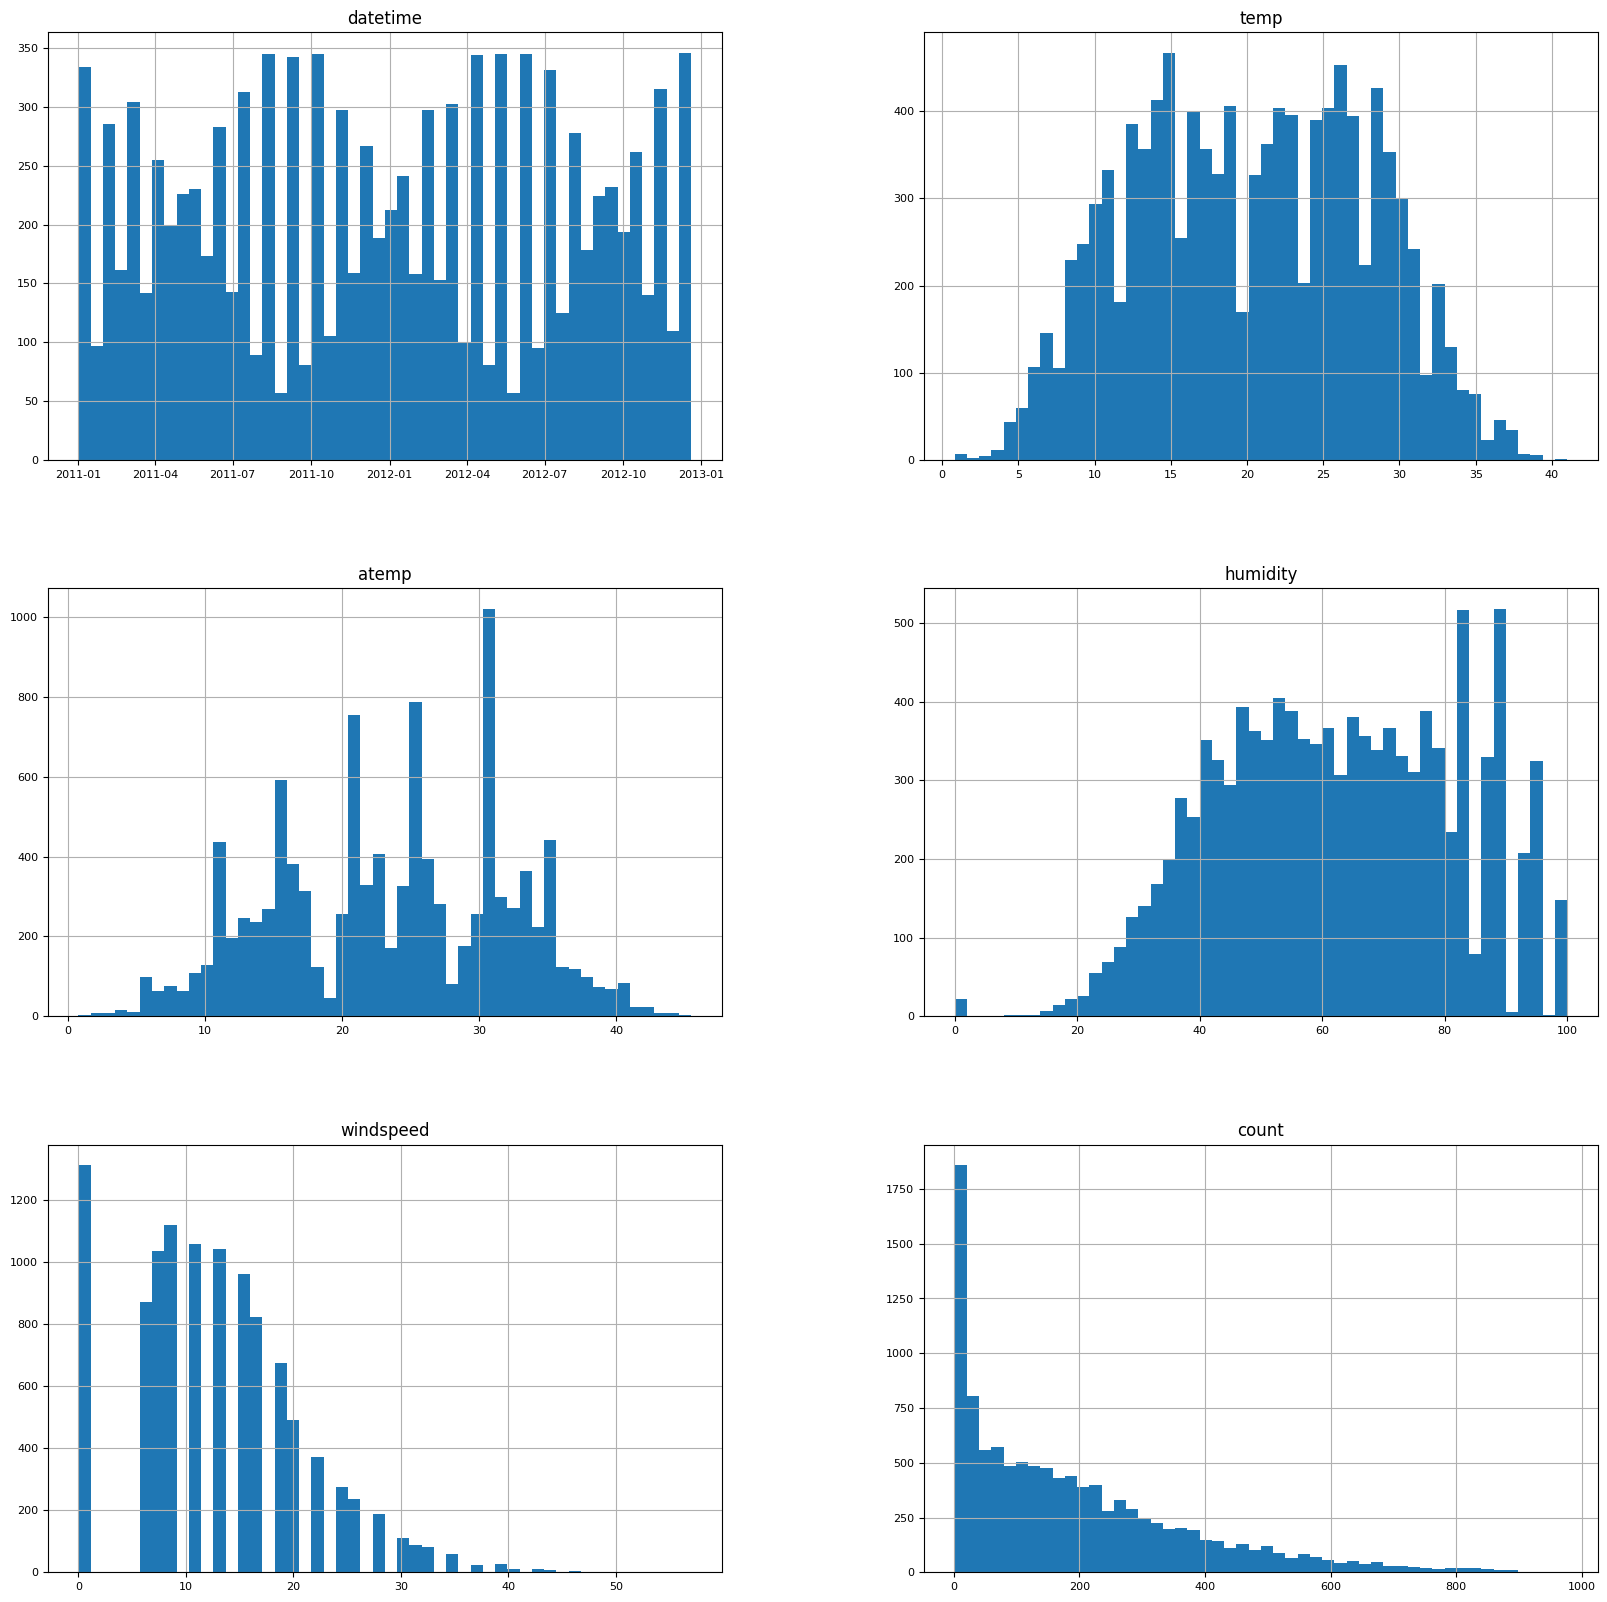

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)


In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# train["season"] = ?
# train["weather"] = ?
# test["season"] = ?
# test["weather"] = ?

for col in['season', 'holiday', 'workingday', 'weather', 'hour', 'day', 'month']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

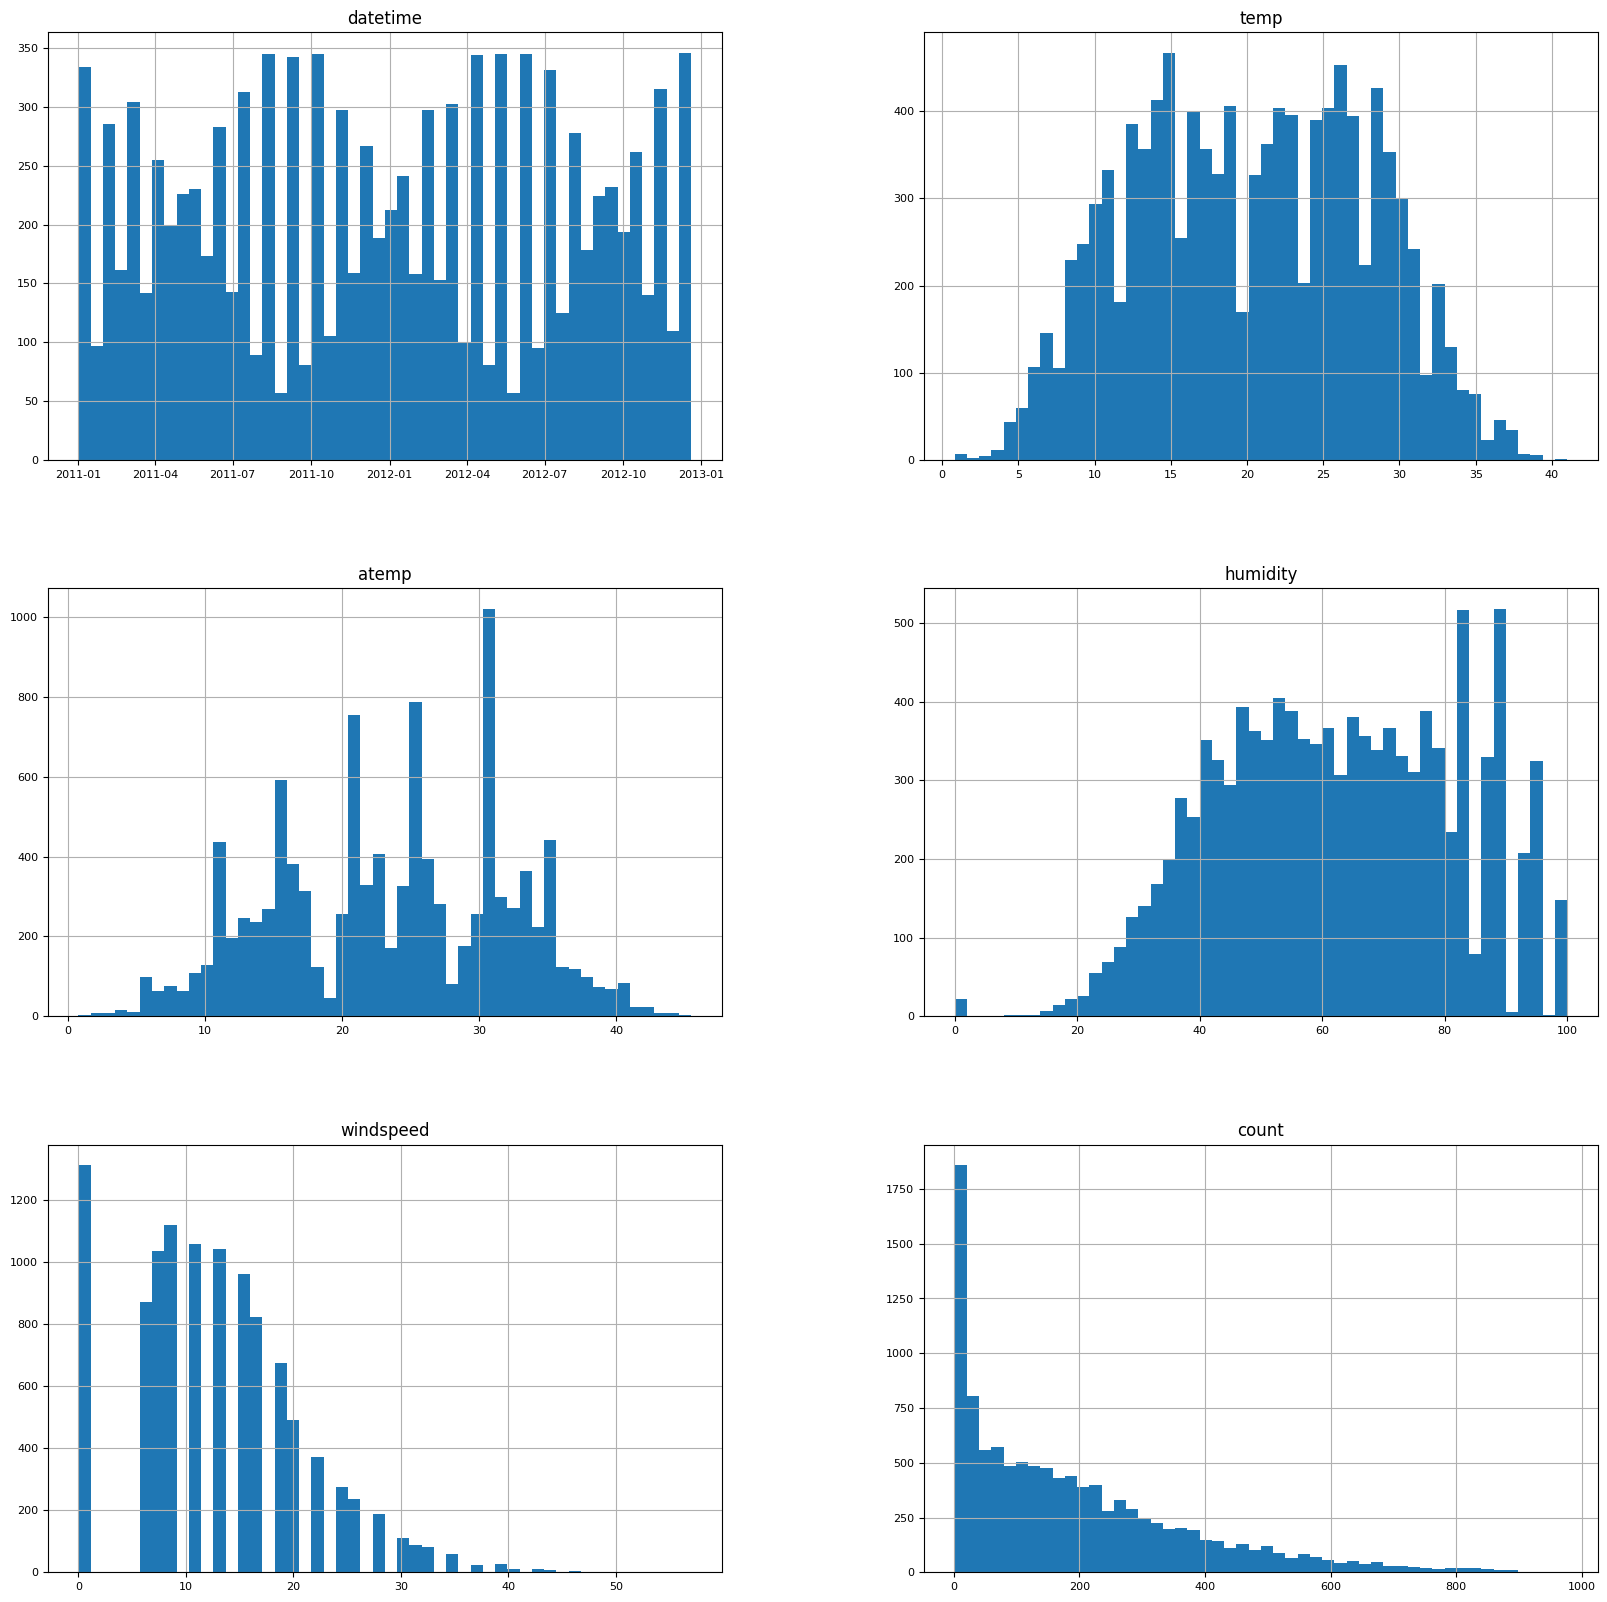

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# Drop leakage columns again
# train_featured = train.drop(columns=["casual", "registered"])

# Fit the model again with the new features
predictor_new_features = TabularPredictor(label='count', eval_metric='rmse', path='autogluon_models_v2').fit(
    train,
    time_limit= 600,
    presets='best_quality'
)
# Show the leaderboard of the new model
predictor_new_features.leaderboard(silent=True)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.44 GB / 12.67 GB (82.4%)
Disk Space Avail:   183.86 GB / 225.83 GB (81.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stac

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-30.567641,root_mean_squared_error,25.403602,393.565363,0.000824,0.033681,3,True,11
1,LightGBM_BAG_L2,-31.058038,root_mean_squared_error,23.081247,293.252654,0.641971,42.446410,2,True,9
2,LightGBMXT_BAG_L2,-31.076403,root_mean_squared_error,23.992940,298.800028,1.553664,47.993784,2,True,8
3,RandomForestMSE_BAG_L2,-32.644126,root_mean_squared_error,23.207142,303.091487,0.767866,52.285243,2,True,10
4,WeightedEnsemble_L2,-33.417717,root_mean_squared_error,22.165215,198.508794,0.000683,0.022190,2,True,7
5,LightGBMXT_BAG_L1,-34.970863,root_mean_squared_error,16.543281,106.158303,16.543281,106.158303,1,True,3
6,LightGBM_BAG_L1,-35.273523,root_mean_squared_error,4.829473,66.099339,4.829473,66.099339,1,True,4
7,RandomForestMSE_BAG_L1,-38.380302,root_mean_squared_error,0.693623,26.185758,0.693623,26.185758,1,True,5
8,CatBoost_BAG_L1,-47.657180,root_mean_squared_error,0.198097,52.275962,0.198097,52.275962,1,True,6
9,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.098155,0.043205,0.098155,0.043205,1,True,2


In [ ]:
# predictor_new_features.fit_summary()

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = predictions_new_features.clip(lower=0)  # Ensure no negative predictions
predictions_new_features.head()

,count
0,18.261559
1,14.149903
2,14.053110
3,11.153679
4,7.748086


In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 898kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-12 03:49:22.080000  new features                       SubmissionStatus.COMPLETE  0.71482      0.71482       
submission_new_features.csv  2025-06-12 03:48:49.150000  new features                       SubmissionStatus.COMPLETE  0.71482      0.71482       
submission.csv               2025-06-12 03:30:26.957000  first raw submission               SubmissionStatus.COMPLETE  1.80486      1.80486       
submission.csv               2025-06-11 22:29:23.557000  first raw submission               SubmissionStatus.COMPLETE  1.80653      1.80653       


#### New Score of `0.71482`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='rmse', path='autogluon_models_v3').fit(
    train,
    time_limit= 600,
    presets='best_quality',
    # hyperparameters='default'  # Use 'experimental' to allow for more complex models)
    hyperparameters={
        'CAT': {'iterations': 1000},  # Customize CatBoost
        'GBM': {},  # LightGBM
        'NN_TORCH': {},  # Neural nets
        'RF': {}  # RandomForest
    },
    dynamic_stacking=False
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.34 GB / 12.67 GB (81.6%)
Disk Space Avail:   183.20 GB / 225.83 GB (81.1%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/autogluon_models_v3"
Train Data Rows:    10886
Train Data Columns: 12
Label Column:       count
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type paramet

In [ ]:
Ha

In [ ]:
# predictor_new_hpo.fit_summary()
predictor_new_hpo.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.037407,root_mean_squared_error,7.956445,570.884081,0.000969,0.034757,3,True,9
1,WeightedEnsemble_L2,-34.238567,root_mean_squared_error,6.045697,226.041400,0.000738,0.025881,2,True,5
2,LightGBM_BAG_L2,-34.508245,root_mean_squared_error,6.761217,429.423128,0.222964,37.553253,2,True,6
3,CatBoost_BAG_L2,-34.679592,root_mean_squared_error,6.731524,486.342209,0.193271,94.472333,2,True,8
4,LightGBM_BAG_L1,-35.273523,root_mean_squared_error,4.806131,68.993848,4.806131,68.993848,1,True,1
5,RandomForest_BAG_L2,-35.316950,root_mean_squared_error,7.539240,438.823738,1.000987,46.953863,2,True,7
6,RandomForest_BAG_L1,-38.380302,root_mean_squared_error,0.960091,24.507842,0.960091,24.507842,1,True,2
7,CatBoost_BAG_L1,-40.284062,root_mean_squared_error,0.278737,132.513830,0.278737,132.513830,1,True,3
8,NeuralNetTorch_BAG_L1,-48.021554,root_mean_squared_error,0.493294,165.854356,0.493294,165.854356,1,True,4


In [ ]:
# Remember to set all negative values to zero
test_predictions_new_features = predictor_new_features.predict(test)
test_predictions_new_features = test_predictions_new_features.clip(lower=0)  # Ensure no negative predictions
test_predictions_new_features.head()

,count
0,18.261559
1,14.149903
2,14.053110
3,11.153679
4,7.748086


In [ ]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = test_predictions_new_features
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 1.01MB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-12 04:05:37.683000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.71482      0.71482       
submission_new_features.csv  2025-06-12 03:49:22.080000  new features                       SubmissionStatus.COMPLETE  0.71482      0.71482       
submission_new_features.csv  2025-06-12 03:48:49.150000  new features                       SubmissionStatus.COMPLETE  0.71482      0.71482       
submission.csv               2025-06-12 03:30:26.957000  first raw submission               SubmissionStatus.COMPLETE  1.80486      1.80486       


#### New Score of `0.71482`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

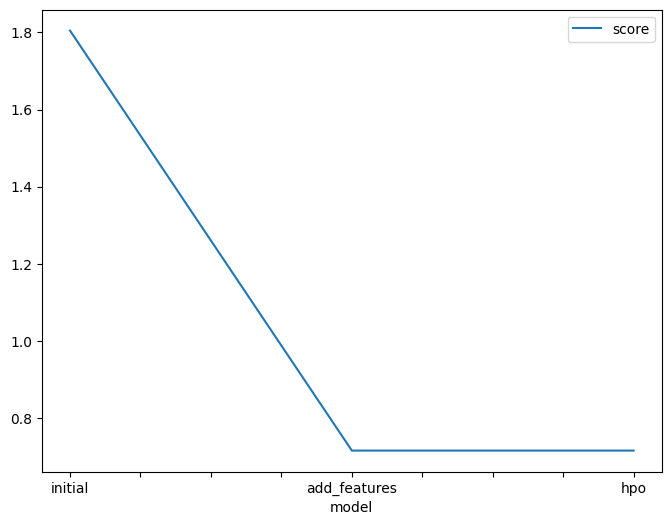

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.80486, 0.71482, 0.71]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

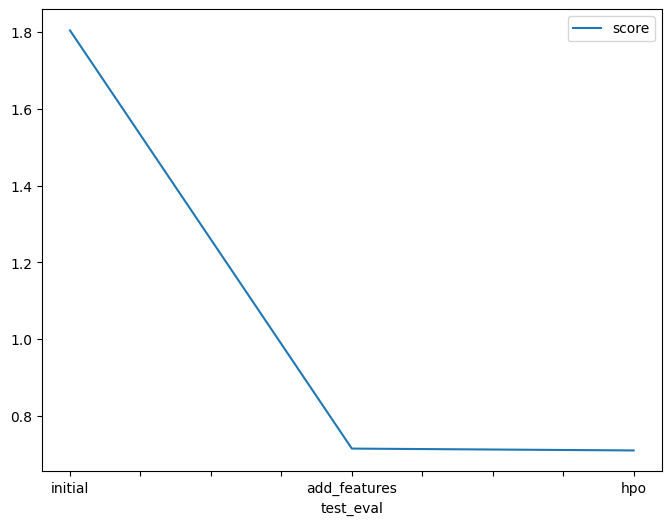

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80486, 0.71482, 0.71]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "{'CAT': {'iterations': 1000}, 'GBM': {}, 'NN_TORCH': {}, 'RF': {}}"],
    "hpo2": ["time_limit=600", "time_limit=600", "time_limit=600"],
    "hpo3": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality', dynamic_stacking=False"],
    "score": [1.80486, 0.71482, 0.71482]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,time_limit=600,presets='best_quality',1.80486
1,add_features,default,time_limit=600,presets='best_quality',0.71482
2,hpo,"{'CAT': {'iterations': 1000}, 'GBM': {}, 'NN_T...",time_limit=600,"presets='best_quality', dynamic_stacking=False",0.71482
